Ridge and Lasso or L1 and L2 regularization type regressions

Used when there is multicollinearity and many features

Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.


Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
boston_data = datasets.load_boston()

In [51]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

To check the collinearity of each feature with the target

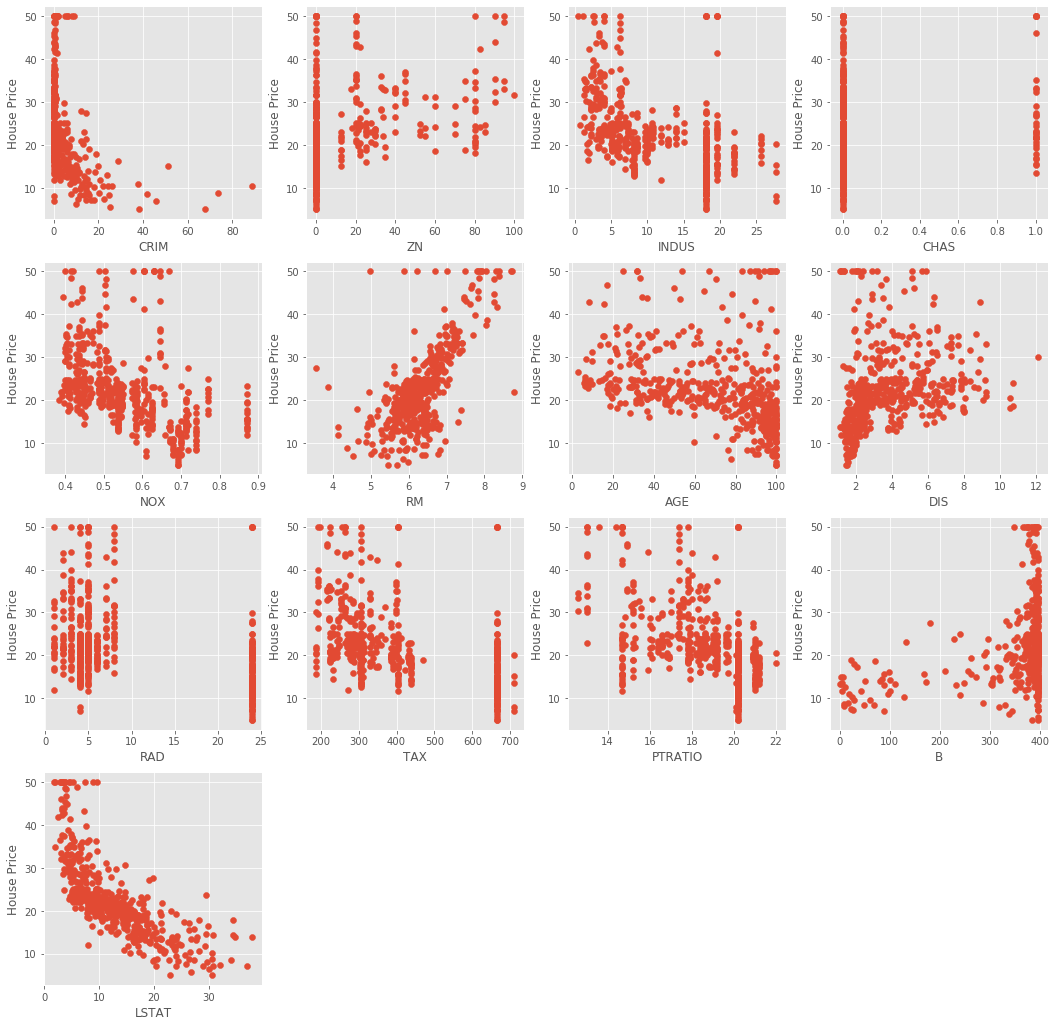

In [52]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,18))

for index, feature_name in enumerate(boston_data.feature_names):
    ax = fig.add_subplot(4,4,index+1)
    ax.scatter(boston_data.data[:,index],boston_data.target)
    ax.set_ylabel('House Price', size = 12) 
    ax.set_xlabel(feature_name, size = 12)
plt.show()

In [53]:
boston = pd.DataFrame(boston_data.data)
boston.columns = boston_data.feature_names
boston_target = np.asarray(boston_data.target)
boston['House Pice'] = pd.Series(boston_target)

In [54]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [55]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Pice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [57]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House Pice, Length: 506, dtype: float64

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print('Train Shape',X_train.shape,X_test.shape)
print('Test Shape',X_test.shape,y_test.shape)

Train Shape (379, 13) (127, 13)
Test Shape (127, 13) (127,)


Ridge Regression

In [59]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=1)
ridgeR.fit(X_train,y_train)
y_pred = ridgeR.predict(X_test)

In [60]:
y_pred

array([17.22805678, 15.45458555, 30.00871244, 26.88474967,  9.8517469 ,
       30.67728315, -0.46805339, 27.60357108, 15.99025254, 18.44987111,
       21.58505515, 37.10561292, 19.03342858, 21.42355827, 14.9195467 ,
       39.64962852, 27.36397681, 17.14685034, 21.89589226, 23.64073101,
       27.17131445, 30.20303477, 18.39267049, 26.25946777, 23.90854466,
       17.95983269, 14.79538225, 20.28416939, 23.12522787, 28.07059399,
       18.95780058, 23.12964951, 12.22368243, 24.76178361, 28.45083171,
       20.27058575, 19.89562892, 27.79728394, 10.54902618, 10.2084121 ,
       21.85720993, 28.649291  , 20.74592286, 13.92562594, 22.41382941,
       24.89179997, 38.90894549, 19.0618839 , 17.62483697, 24.71487928,
       22.26231315,  9.84075721, 33.88446766, 10.65227733, 16.16680112,
       21.91546277, 24.70189349, 16.33348975, 14.93193276, 31.70083129,
       17.18442022, 23.59088691, 31.22801977, 21.39308565, 39.43410693,
       13.72736512,  2.46635468, 33.77599556, 23.2767377 , 28.02

In [61]:
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

35.13805528883109


In [62]:
print(r2_score(y_pred,y_test))

0.4441124796086421


In [63]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

    Columns  Coefficient Estimate
0      CRIM             -0.103165
1        ZN              0.040310
2     INDUS             -0.015394
3      CHAS              2.088933
4       NOX             -9.111971
5        RM              4.209331
6       AGE             -0.004273
7       DIS             -1.123776
8       RAD              0.259181
9       TAX             -0.013402
10  PTRATIO             -0.820592
11        B              0.007855
12    LSTAT             -0.489957


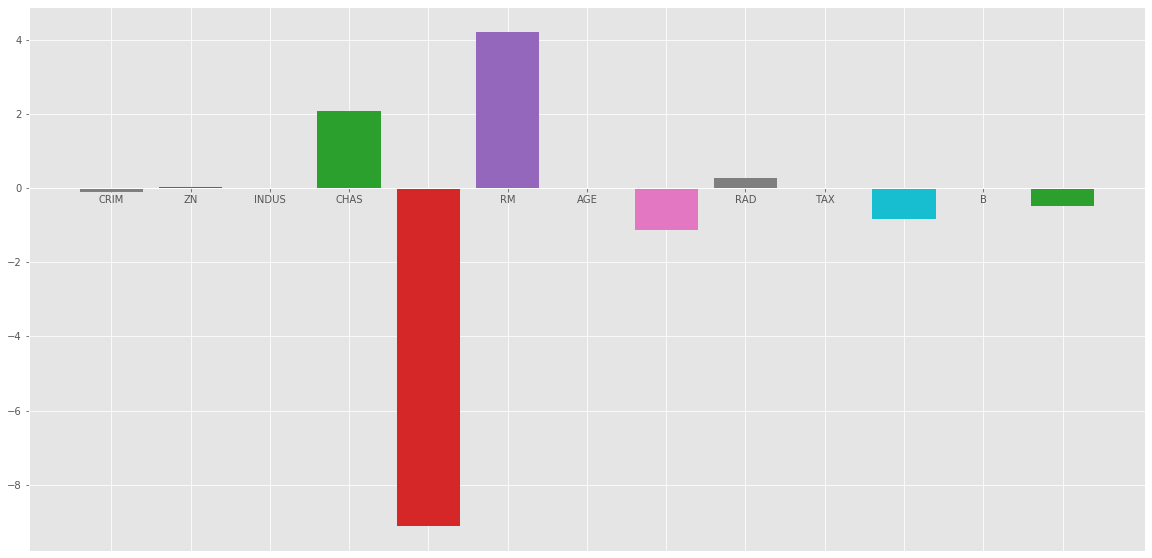

In [64]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(ridge_coefficient["Columns"],  
ridge_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

Lasso Regression

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test) 

In [67]:
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

Mean squared error on test set 40.06927151487654
    Columns  Coefficient Estimate
0      CRIM             -0.059326
1        ZN              0.044068
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.356663
6       AGE              0.022644
7       DIS             -0.477385
8       RAD              0.230793
9       TAX             -0.015587
10  PTRATIO             -0.657421
11        B              0.006170
12    LSTAT             -0.713611


In [68]:
print(r2_score(y_pred,y_test))

0.4441124796086421


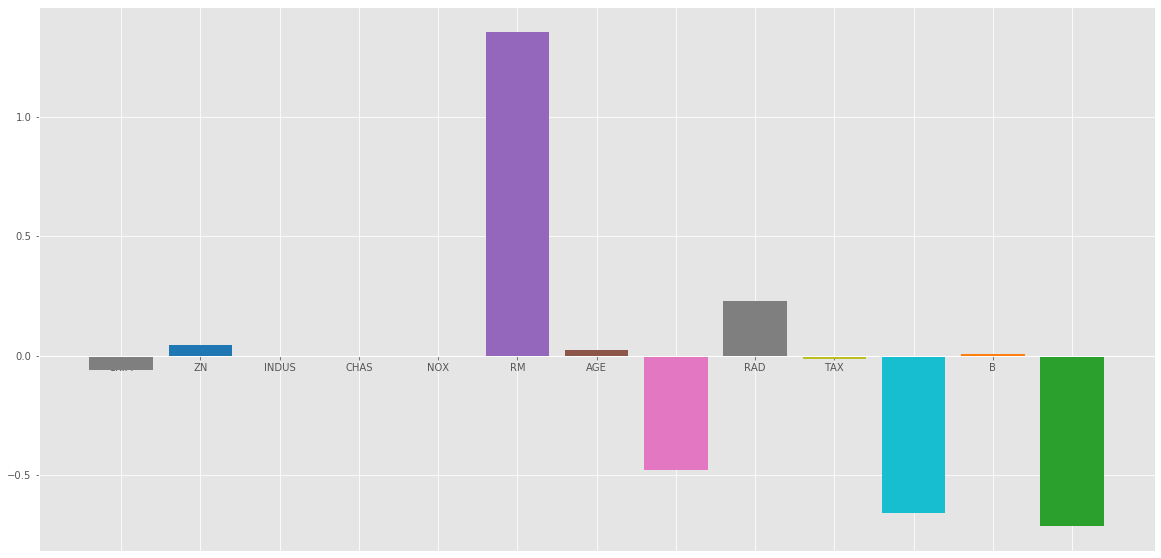

In [69]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

As Lasso (L1 regularization) can be used for feature selection, the features showing bigger bar plots can be chosen